In [1]:
library(tidymodels)
library(tidyverse)
library(plyr)
library(dplyr)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ recipes      1.0.1
✔ dials        1.0.0     ✔ rsample      1.0.0
✔ dplyr        1.0.9     ✔ tibble       3.1.7
✔ ggplot2      3.3.6     ✔ tidyr        1.2.0
✔ infer        1.0.2     ✔ tune         1.0.0
✔ modeldata    1.0.0     ✔ workflows    1.0.0
✔ parsnip      1.0.0     ✔ workflowsets 1.0.0
✔ purrr        0.3.4     ✔ yardstick    1.0.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ forcats 0.5.1
✔ stringr 1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor()

In [2]:
download.file("https://raw.githubusercontent.com/RegalSword/DSCI-Group-123-Project/main/winequality-red.csv", 
              destfile = "winequality-red.csv") 

download.file("https://raw.githubusercontent.com/RegalSword/DSCI-Group-123-Project/main/winequality-white.csv",
              destfile = "winequality-white.csv") 

redwine_df <- read_delim(file = "winequality-red.csv", delim = ";") %>%
         cbind(wine_type = "Red") # adding column to distinguish red wine and its components

whitewine_df <- read_delim(file = "winequality-white.csv", delim = ";") %>%
         cbind(wine_type = "White") # adding column to distinguish white wine and its components

wine_df <- rbind(redwine_df, whitewine_df) %>%  # combining red and white wine data
         rename(c("fixed acidity" = "fixed_acid", # changing column names to make it easier for selecting and cleaing data
                  "volatile acidity" = "volatile_acid",
                  "citric acid" = "citric_acid",
                  "total sulfur dioxide" = "total_SO2"))

head(wine_df) # Demonstrates that the dataset can be read from the web into R

wine_split <- initial_split(wine_df, prop = 0.80, wine_type = Class)
wine_train <- training(wine_split)  # training dataframe
wine_test <- testing(wine_split)  # testing dataframe

glimpse(wine_train)
glimpse(wine_test)

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,fixed_acid,volatile_acid,citric_acid,residual sugar,chlorides,free sulfur dioxide,total_SO2,density,pH,sulphates,alcohol,quality,wine_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,Red


Rows: 5,197
Columns: 13
$ fixed_acid            <dbl> 8.5, 7.1, 7.7, 5.0, 8.9, 6.7, 6.4, 6.6, 5.6, 5.3…
$ volatile_acid         <dbl> 0.180, 0.600, 0.280, 0.270, 0.500, 0.325, 0.690,…
$ citric_acid           <dbl> 0.51, 0.01, 0.33, 0.32, 0.21, 0.82, 0.09, 0.38, …
$ `residual sugar`      <dbl> 1.75, 2.30, 6.70, 4.50, 2.20, 1.20, 7.60, 16.05,…
$ chlorides             <dbl> 0.071, 0.079, 0.037, 0.032, 0.088, 0.152, 0.044,…
$ `free sulfur dioxide` <dbl> 45, 24, 32, 58, 21, 49, 34, 16, 14, 7, 43, 23, 3…
$ total_SO2             <dbl> 88, 37, 155, 178, 39, 120, 144, 165, 73, 62, 136…
$ density               <dbl> 0.99524, 0.99514, 0.99510, 0.98956, 0.99692, 0.9…
$ pH                    <dbl> 3.33, 3.40, 3.39, 3.45, 3.33, 2.99, 3.26, 3.38, …
$ sulphates             <dbl> 0.76, 0.61, 0.62, 0.31, 0.83, 0.38, 0.38, 0.60, …
$ alcohol               <dbl> 11.8, 10.9, 10.7, 12.6, 11.1, 9.2, 10.1, 9.2, 11…
$ quality               <dbl> 7, 6, 7, 7, 6, 5, 6, 5, 7, 5, 6, 5, 7, 5, 6, 5, …
$ wine_type     

In [3]:
wine_variables <- select(wine_train,
                         fixed_acid,
                         volatile_acid,
                         citric_acid,
                         total_SO2,
                         sulphates,
                         wine_type) %>%
                  mutate(wine_type = as_factor(wine_type))

head(wine_variables) # Clean data in a tidy format using only training data

wine_variables %>% 
    pull(wine_type) %>%
    levels() # Outputs total number of categories (dependent variables)

# Exploratory data analysis:
wine_summary <- nrow(wine_variables) 
        wine_variables %>%
        group_by(wine_type) %>%
        dplyr::summarize(count = n(), # Total number of observations in each class 
                         wine_proportion = n() / wine_summary * 100, # The percentage of each class indicating the proportion relative to the dataset
                         mean_fixed_acid = mean(fixed_acid), # Means of fixed acidity in each class
                         mean_volatile_acid = mean(volatile_acid), # Means of volatile acidity in each class
                         mean_citric_acid = mean(citric_acid), # Means of citric acid in each class
                         mean_total_SO2 = mean(total_SO2), # Means of total sulfure dioxide in each class
                         mean_sulphates = mean(sulphates)) # Means of sulfates in each class

,fixed_acid,volatile_acid,citric_acid,total_SO2,sulphates,wine_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1157,8.5,0.180,0.51,88,0.76,Red
1250,7.1,0.600,0.01,37,0.61,Red
2578,7.7,0.280,0.33,155,0.62,White
4590,5.0,0.270,0.32,178,0.31,White
1040,8.9,0.500,0.21,39,0.83,Red
4420,6.7,0.325,0.82,120,0.38,White


[1] "Red"   "White"

wine_type,count,wine_proportion,mean_fixed_acid,mean_volatile_acid,mean_citric_acid,mean_total_SO2,mean_sulphates
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Red,1303,25.07216,8.299233,0.5267690,0.2710591,46.21489,0.6569992
White,3894,74.92784,6.860208,0.2778172,0.3336595,138.19569,0.4899178


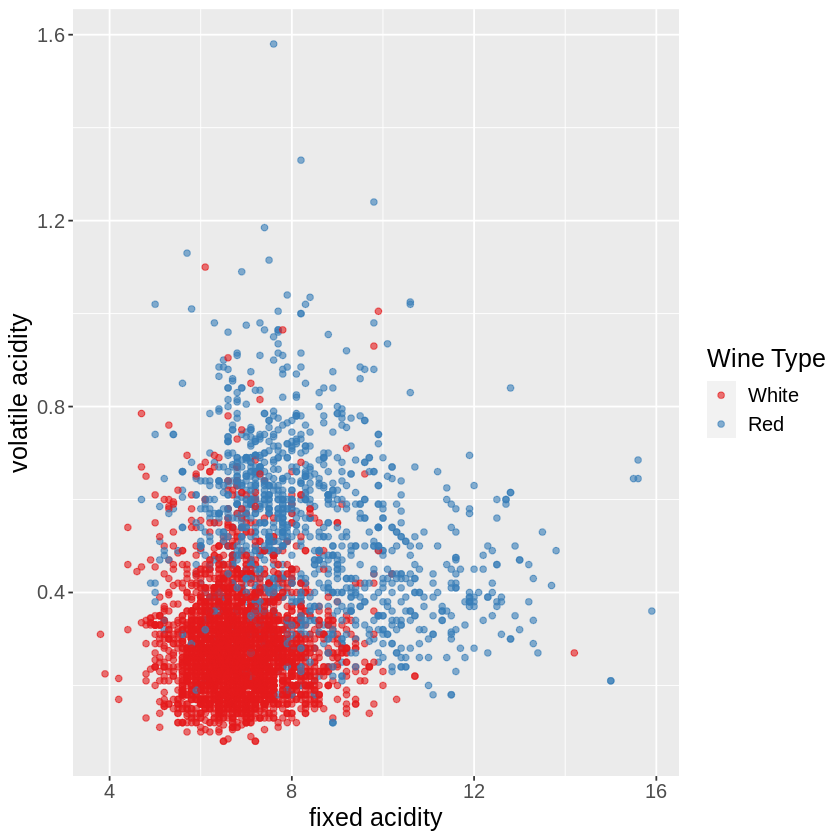

In [38]:
fixed_volatile <- wine_variables %>%
            ggplot(aes(x = fixed_acid, 
                       y = volatile_acid,
                       color = wine_type)) +
            geom_point(alpha = 0.6) +
            labs(x = "Fixed Acidity", 
                 y = "Volatile Acidity",
                 color = "Wine Type") +
            theme(text = element_text(size = 15)) +
            scale_color_brewer(palette = "Set1")

fixed_volatile # Scatter plot to visualize the relationship between the fixed acidity and volatile acidity variables.